## Export measurements

Go to **Measure** → **Export Measurement**
→ Select your **training image composite**
→ Define the **output path**
→ Set **Export type** to **Detection**

In [4]:
import pandas as pd
# Replace 'your_file.tsv' with the path to your tsv file, you can export the
df = pd.read_csv('/path/to/feature.tsv', sep='\t')
headers = df.columns.tolist()
print("Headers:", headers)
print("total number of columns:", len(headers))
if 'Class' in df.columns:
    unique_labels = df['Class'].unique()
    print("Unique labels in 'Class' column:", unique_labels)
else:
    print("The 'Class' column is not present in the DataFrame.")

Headers: ['Image', 'Object ID', 'Name', 'Class', 'Parent', 'ROI', 'Centroid X µm', 'Centroid Y µm', 'Nucleus: Area', 'Nucleus: Perimeter', 'Nucleus: Circularity', 'Nucleus: Max caliper', 'Nucleus: Min caliper', 'Nucleus: Eccentricity', 'Nucleus: Hematoxylin OD mean', 'Nucleus: Hematoxylin OD sum', 'Nucleus: Hematoxylin OD std dev', 'Nucleus: Hematoxylin OD max', 'Nucleus: Hematoxylin OD min', 'Nucleus: Hematoxylin OD range', 'Nucleus: Eosin OD mean', 'Nucleus: Eosin OD sum', 'Nucleus: Eosin OD std dev', 'Nucleus: Eosin OD max', 'Nucleus: Eosin OD min', 'Nucleus: Eosin OD range', 'Cell: Area', 'Cell: Perimeter', 'Cell: Circularity', 'Cell: Max caliper', 'Cell: Min caliper', 'Cell: Eccentricity', 'Cell: Hematoxylin OD mean', 'Cell: Hematoxylin OD std dev', 'Cell: Hematoxylin OD max', 'Cell: Hematoxylin OD min', 'Cell: Eosin OD mean', 'Cell: Eosin OD std dev', 'Cell: Eosin OD max', 'Cell: Eosin OD min', 'Cytoplasm: Hematoxylin OD mean', 'Cytoplasm: Hematoxylin OD std dev', 'Cytoplasm: Hem

## Data cleaning: handling missing values

In [6]:
# define feature and label columns
feature_cols = df.columns[9:834]
label_col = 'Class'
total_rows = df.shape[0]
df_subset = df[feature_cols.tolist() + [label_col]]
df_clean = df_subset.dropna()
clean_rows = df_clean.shape[0]

# calculate number and proportion of dropped rows
dropped_rows = total_rows - clean_rows
drop_proportion = dropped_rows / total_rows

print(f"Total rows: {total_rows}")
print(f"Rows after dropping NaNs: {clean_rows}")
print(f"Rows with NaNs: {dropped_rows}")
print(f"Proportion dropped due to NaNs: {drop_proportion:.2%}")


Total rows: 27349
Rows after dropping NaNs: 25962
Rows with NaNs: 1387
Proportion dropped due to NaNs: 5.07%


## Feature importance with random forest

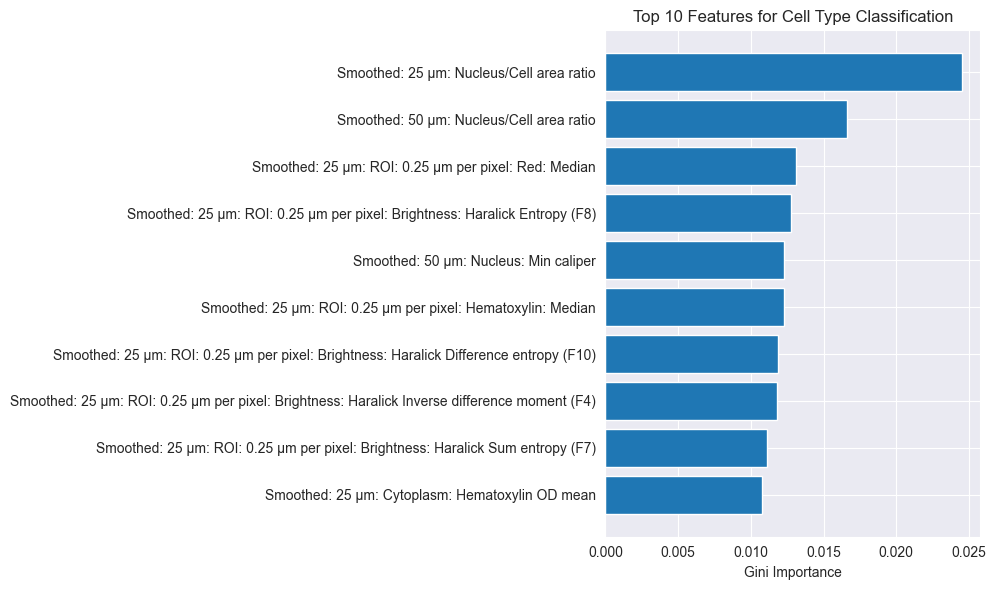

In [7]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

feature_cols = df.columns[9:834]  # features in columns 9 to 833
label_col = 'Class'
df_subset = df[feature_cols.tolist() + [label_col]]
df_clean = df_subset.dropna()
X = df_clean[feature_cols]
y = df_clean[label_col]
le = LabelEncoder()
y_encoded = le.fit_transform(y)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y_encoded)
importances = clf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
top_features = importance_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()  # Most important on top
plt.xlabel('Gini Importance')
plt.title('Top 10 Features for Cell Type Classification')
plt.tight_layout()
plt.show()


## select and plot top 20 features

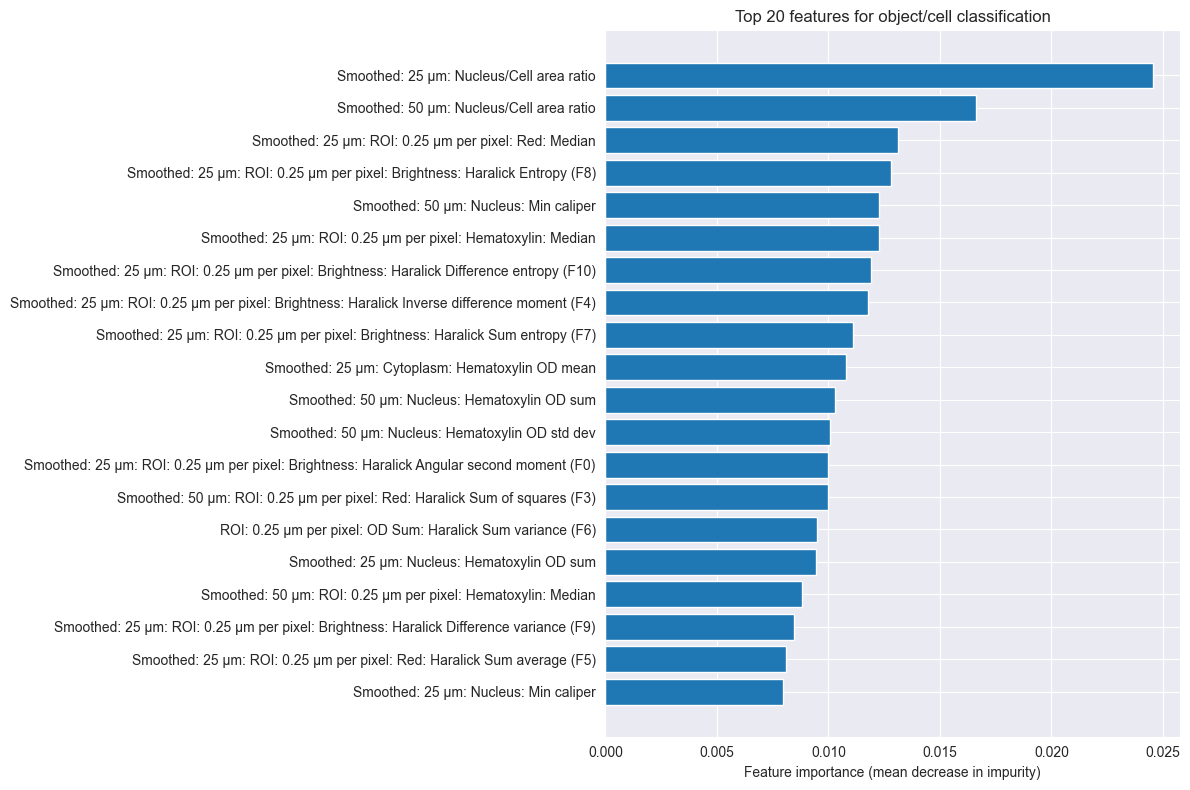

In [10]:
top_features = importance_df.head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Feature importance (mean decrease in impurity)')
plt.title('Top 20 features for object/cell classification')
plt.tight_layout()
plt.savefig('top_20_feature_importance.pdf', format='pdf')
plt.show()